In [1]:
import numpy as np
import os
import pickle
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from sklearn.preprocessing import StandardScaler
import pandas as pd

from utils import *

In [2]:
device = torch.device('cuda:0')

In [3]:
result_dir = '../results/ids-dataset'
batch_size = 256

In [4]:
Xtr_, ytr, Xte_,yte,st_scaler_bn = load_cicids_data(dataname="2018",prob_type="binary",
                                                  result_dir = result_dir, return_scaler =True)

/home/saerom/.pyenv/versions/pytorch111/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
Xtr = st_scaler_bn.transform(Xtr_)
Xte = st_scaler_bn.transform(Xte_)
train_bnloader = make_dataloader(Xtr,ytr, batch_size = batch_size, shuffle=True)
test_bnloader = make_dataloader(Xte,yte, batch_size = batch_size, shuffle=False)

In [6]:
Xtrm_, ytrm, Xtem_,ytem,st_scaler_mul = load_cicids_data(dataname="2018",prob_type="mult",
                                                         result_dir = result_dir, return_scaler =True)

{'Brute Force -Web': 0, 'Brute Force -XSS': 0, 'SQL Injection': 0, 'DoS attacks-Hulk': 1, 'DoS attacks-GoldenEye': 2, 'DoS attacks-Slowloris': 3, 'Bot': 4, 'DDoS attacks-LOIC-HTTP': 5, 'DDOS attack-HOIC': 6, 'Infilteration': 7, 'FTP-BruteForce': 8, 'SSH-Bruteforce': 9}
drop Benign
drop DoS attacks-SlowHTTPTest
original instances:  5971201
drop intances:  5310540
after drop:  660661
drop Benign
drop DoS attacks-SlowHTTPTest
original instances:  1492801
drop intances:  1327411
after drop:  165390


/home/saerom/.pyenv/versions/pytorch111/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
Xtrm = st_scaler_mul.transform(Xtrm_)
Xtem = st_scaler_mul.transform(Xtem_)
train_mulloader = make_dataloader(Xtrm,ytrm.to_numpy().flatten(), batch_size = batch_size, shuffle=True)
test_mulloader = make_dataloader(Xtem,ytem.to_numpy().flatten(), batch_size = batch_size, shuffle=False)

## 수정 필요! scaling 을 multi-classification 에 맞추어야 함!

In [8]:
Xbtr = st_scaler_mul.transform(Xtr_[ytr==0])
Xbte = st_scaler_mul.transform(Xte_[yte==0])
outlier_trloader = make_dataloader(Xbtr,np.zeros(len(Xbtr)),batch_size=batch_size, shuffle=True)
outlier_teloader = make_dataloader(Xbte,np.zeros(len(Xbte)),batch_size=batch_size, shuffle=True)

In [9]:
lab_dic, lab_name = cluster_labels_2018()

{'Brute Force -Web': 0, 'Brute Force -XSS': 0, 'SQL Injection': 0, 'DoS attacks-Hulk': 1, 'DoS attacks-GoldenEye': 2, 'DoS attacks-Slowloris': 3, 'Bot': 4, 'DDoS attacks-LOIC-HTTP': 5, 'DDOS attack-HOIC': 6, 'Infilteration': 7, 'FTP-BruteForce': 8, 'SSH-Bruteforce': 9}


# binary classification

In [10]:
n_features = Xtr.shape[1]
clf_bn = BinaryNN(n_features)

In [11]:
epochs = 30
criterion_bn = nn.BCELoss()
optim_bn = optim.Adam(clf_bn.parameters(),lr=0.0001)

In [12]:
# clf_bn.load_state_dict(torch.load(os.path.join(result_dir, "cicids17_bn_clf.pth"),map_location='cpu'))
clf_bn = train_model(clf_bn, train_bnloader, optim_bn, device, criterion_bn, epochs, save_dir = result_dir, 
                     save_model = "cicids18_bn_clf.pth",binary=True)


Epoch [1/30]	Loss 0.0869 (0.0842)	Prec@1 train 98.099 (3.432)   	

Epoch [2/30]	Loss 0.0515 (0.0293)	Prec@1 train 98.848 (nan)   	

Epoch [3/30]	Loss 0.0480 (0.0269)	Prec@1 train 98.910 (nan)   	

Epoch [4/30]	Loss 0.0465 (0.0261)	Prec@1 train 98.926 (nan)   	

Epoch [5/30]	Loss 0.0456 (0.0256)	Prec@1 train 98.933 (nan)   	

Epoch [6/30]	Loss 0.0451 (0.0255)	Prec@1 train 98.938 (nan)   	

Epoch [7/30]	Loss 0.0447 (0.0256)	Prec@1 train 98.950 (nan)   	

Epoch [8/30]	Loss 0.0445 (0.0255)	Prec@1 train 98.954 (nan)   	

Epoch [9/30]	Loss 0.0442 (0.0253)	Prec@1 train 98.955 (nan)   	

Epoch [10/30]	Loss 0.0440 (0.0252)	Prec@1 train 98.956 (nan)   	

Epoch [11/30]	Loss 0.0439 (0.0253)	Prec@1 train 98.957 (nan)   	

Epoch [12/30]	Loss 0.0438 (0.0248)	Prec@1 train 98.959 (nan)   	

Epoch [13/30]	Loss 0.0436 (0.0249)	Prec@1 train 98.960 (nan)   	

Epoch [14/30]	Loss 0.0436 (0.0255)	Prec@1 train 98.963 (nan)   	

Epoch [15/30]	Loss 0.0435 (0.0249)	Prec@1 train 98.963 (nan)   	

Epoch [16/30]	Lo

In [12]:
# torch.save(clf_mul,os.path.join(result_dir, "cicids17_bn_clf.pth"))
clf_bn.load_state_dict(torch.load(os.path.join(result_dir, "cicids18_bn_clf.pth"),map_location='cpu'))
test_model(clf_bn, test_bnloader, criterion_bn, device, 100.0, binary=True)

(tensor(0.0423), tensor(98.9970), tensor(0.5192))

In [26]:
from sklearn.metrics import roc_curve, auc

predy = get_prediction(clf_bn, test_bnloader, device)
testy = test_bnloader.dataset.tensors[1]
pos_label = 1 # 1 or 0
fpr, tpr, thresholds = roc_curve(testy.numpy(), predy.numpy(), pos_label=pos_label)
roc_auc = auc(fpr, tpr)

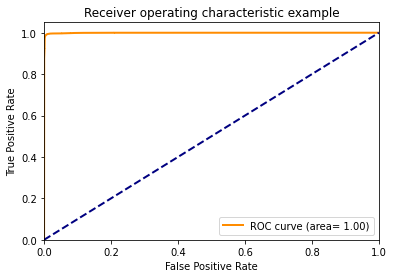

In [27]:
import matplotlib.pyplot as plt

lw=2
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=lw, label ="ROC curve (area= %.2f)"%roc_auc)
plt.plot([0,1],[0,1], color = "navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

# multi-class classification

In [41]:
num_class = len(np.unique(ytrm))
n_features = Xtrm.shape[1]

In [42]:
clf_mul = MultNN(n_features, n_hidden=32, num_class=num_class)

In [43]:
epochs = 30
criterion_mul = nn.CrossEntropyLoss(label_smoothing=0.09)
criterion_oe = nn.KLDivLoss()
optim_mul = optim.Adam(clf_mul.parameters(),lr=0.0001)

In [44]:
clf_mul = train_model(clf_mul, train_mulloader, optim_mul, device, criterion_mul, epochs, save_dir = result_dir, 
                     save_model = "cicids18_mul_clf_LS.pth", binary=False)


Epoch [1/30]	Loss 0.8630 (0.5002)	Prec@1 train 90.690 (19.226)   	

Epoch [2/30]	Loss 0.4948 (0.0285)	Prec@1 train 99.577 (0.322)   	

Epoch [3/30]	Loss 0.4758 (0.0157)	Prec@1 train 99.716 (0.267)   	

Epoch [4/30]	Loss 0.4695 (0.0092)	Prec@1 train 99.825 (0.210)   	

Epoch [5/30]	Loss 0.4670 (0.0062)	Prec@1 train 99.875 (0.188)   	

Epoch [6/30]	Loss 0.4655 (0.0053)	Prec@1 train 99.892 (0.165)   	

Epoch [7/30]	Loss 0.4645 (0.0048)	Prec@1 train 99.897 (0.165)   	

Epoch [8/30]	Loss 0.4638 (0.0043)	Prec@1 train 99.905 (0.159)   	

Epoch [9/30]	Loss 0.4633 (0.0042)	Prec@1 train 99.918 (0.150)   	

Epoch [10/30]	Loss 0.4629 (0.0040)	Prec@1 train 99.921 (0.153)   	

Epoch [11/30]	Loss 0.4626 (0.0038)	Prec@1 train 99.926 (0.147)   	

Epoch [12/30]	Loss 0.4623 (0.0036)	Prec@1 train 99.932 (0.147)   	

Epoch [13/30]	Loss 0.4621 (0.0035)	Prec@1 train 99.933 (0.143)   	

Epoch [14/30]	Loss 0.4619 (0.0033)	Prec@1 train 99.934 (0.136)   	

Epoch [15/30]	Loss 0.4617 (0.0031)	Prec@1 train 99.934 

In [32]:
# clf_mul = train_model(clf_mul, train_mulloader, optim_mul, device, criterion_mul, epochs, save_dir = result_dir, 
#                      save_model = "cicids18_mul_clf.pth", binary=False)


Epoch [1/30]	Loss 0.5660 (0.6369)	Prec@1 train 90.705 (17.803)   	

Epoch [2/30]	Loss 0.0448 (0.0361)	Prec@1 train 99.560 (0.322)   	

Epoch [3/30]	Loss 0.0168 (0.0223)	Prec@1 train 99.717 (0.280)   	

Epoch [4/30]	Loss 0.0091 (0.0139)	Prec@1 train 99.851 (0.198)   	

Epoch [5/30]	Loss 0.0064 (0.0103)	Prec@1 train 99.878 (0.182)   	

Epoch [6/30]	Loss 0.0052 (0.0089)	Prec@1 train 99.891 (0.174)   	

Epoch [7/30]	Loss 0.0043 (0.0077)	Prec@1 train 99.902 (0.171)   	

Epoch [8/30]	Loss 0.0037 (0.0068)	Prec@1 train 99.906 (0.162)   	

Epoch [9/30]	Loss 0.0033 (0.0064)	Prec@1 train 99.908 (0.156)   	

Epoch [10/30]	Loss 0.0029 (0.0056)	Prec@1 train 99.919 (0.156)   	

Epoch [11/30]	Loss 0.0026 (0.0049)	Prec@1 train 99.931 (0.136)   	

Epoch [12/30]	Loss 0.0023 (0.0047)	Prec@1 train 99.943 (0.129)   	

Epoch [13/30]	Loss 0.0021 (0.0043)	Prec@1 train 99.952 (0.117)   	

Epoch [14/30]	Loss 0.0019 (0.0040)	Prec@1 train 99.958 (0.113)   	

Epoch [15/30]	Loss 0.0017 (0.0039)	Prec@1 train 99.960 

In [16]:
# clf_mul = train_model_with_oe_KL(clf_mul, train_mulloader, outlier_trloader, num_class, optim_mul, device, 
#                                  criterion_mul, criterion_oe, 1.0,epochs, save_dir = result_dir, 
#                      save_model = "cicids18_mul_clf_OE.pth",binary=False)

/home/saerom/.pyenv/versions/pytorch111/lib/python3.8/site-packages/torch/nn/functional.py:2747: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(



Epoch [1/30]	Loss 0.6813 (0.6374)	Loss1/Loss2 0.6286/0.0527	Prec@1 train 89.760 (20.682)   	

Epoch [2/30]	Loss 0.1519 (0.0339)	Loss1/Loss2 0.0990/0.0529	Prec@1 train 99.358 (0.417)   	

Epoch [3/30]	Loss 0.1105 (0.0211)	Loss1/Loss2 0.0658/0.0446	Prec@1 train 99.558 (0.295)   	

Epoch [4/30]	Loss 0.0945 (0.0212)	Loss1/Loss2 0.0540/0.0405	Prec@1 train 99.687 (0.281)   	

Epoch [5/30]	Loss 0.0865 (0.0168)	Loss1/Loss2 0.0491/0.0373	Prec@1 train 99.774 (0.240)   	

Epoch [6/30]	Loss 0.0817 (0.0137)	Loss1/Loss2 0.0464/0.0353	Prec@1 train 99.808 (0.217)   	

Epoch [7/30]	Loss 0.0786 (0.0133)	Loss1/Loss2 0.0445/0.0341	Prec@1 train 99.835 (0.207)   	

Epoch [8/30]	Loss 0.0767 (0.0136)	Loss1/Loss2 0.0433/0.0334	Prec@1 train 99.855 (0.195)   	

Epoch [9/30]	Loss 0.0751 (0.0127)	Loss1/Loss2 0.0423/0.0328	Prec@1 train 99.865 (0.182)   	

Epoch [10/30]	Loss 0.0739 (0.0124)	Loss1/Loss2 0.0415/0.0324	Prec@1 train 99.880 (0.171)   	

Epoch [11/30]	Loss 0.0729 (0.0120)	Loss1/Loss2 0.0409/0.0319	Prec@1

In [33]:
# clf_mul.load_state_dict(torch.load(os.path.join(result_dir, "cicids17_mul_clf_LS.pth"),map_location='cpu'))
test_model(clf_mul, test_mulloader, criterion_mul, device, 100.0, binary=False)

(tensor(0.0021), tensor(99.9728), tensor(0.0938))

# evaluate multi-class model

In [18]:
from sklearn.metrics import confusion_matrix

In [50]:
pred_m = torch.softmax(get_prediction(clf_mul, test_mulloader, device),dim=1).numpy()
predy_m = np.argmax(pred_m,axis=-1)

In [51]:
confusion_mtx = confusion_matrix(ytem, predy_m)

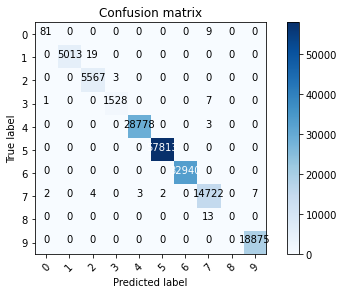

In [52]:
plot_confusion_matrix(confusion_mtx, classes = range(10))

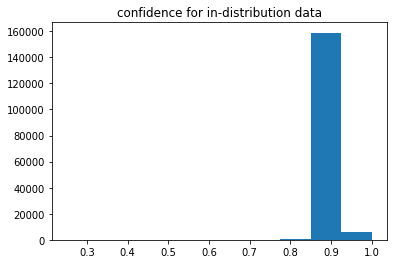

In [53]:
plt.hist(np.max(pred_m,axis=1))
plt.title("confidence for in-distribution data")
plt.show()

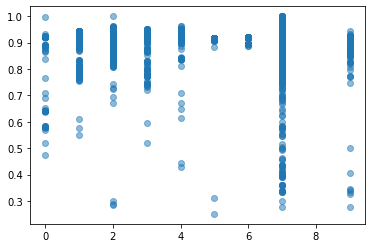

In [55]:
plt.scatter(predy_m,np.max(pred_m,axis=1),alpha=.5)
plt.show()

In [45]:
prob_ooc = torch.softmax(get_prediction(clf_mul, outlier_trloader, device), dim=1)
pred_ooc = torch.argmax(prob_ooc, dim=1)

In [46]:
lab_dic18, lab_name18 = cluster_labels_2018()

{'Brute Force -Web': 0, 'Brute Force -XSS': 0, 'SQL Injection': 0, 'DoS attacks-Hulk': 1, 'DoS attacks-GoldenEye': 2, 'DoS attacks-Slowloris': 3, 'Bot': 4, 'DDoS attacks-LOIC-HTTP': 5, 'DDOS attack-HOIC': 6, 'Infilteration': 7, 'FTP-BruteForce': 8, 'SSH-Bruteforce': 9}


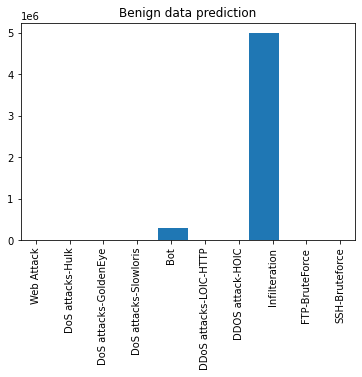

In [47]:
plt.hist(pred_ooc.numpy())
plt.title("Benign data prediction")
plt.xticks(range(10),lab_name18, rotation=90)
plt.show()

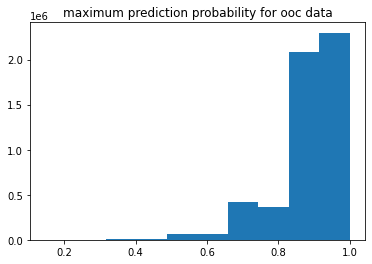

In [48]:
plt.hist(np.max(prob_ooc.numpy(),axis=1))
plt.title("maximum prediction probability for ooc data")
plt.show()

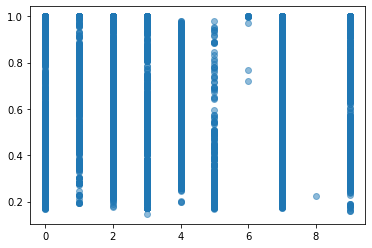

In [49]:
plt.scatter(pred_ooc,np.max(prob_ooc.numpy(),axis=1),alpha=.5)
plt.show()